# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        pprint(city_weather)
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] #YOUR CODE HERE
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE
        city_date = city_weather["dt"]# YOUR CODE HERE
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = city_weather["coord"][0]["lat"]
#         city_lng = city_weather["coord"][0]["lon"]
#         city_max_temp = city_weather["main"][0]["temp_max"]# YOUR CODE HERE
#         city_humidity = city_weather["main"][0]["temp_mmin"]# YOUR CODE HERE
#         city_clouds = city_weather["clouds"][0]["all"]# YOUR CODE HERE
#         city_wind = city_weather["wind"][0]# YOUR CODE HERE
#         city_country = city_weather["sys"][0]["country"]# YOUR CODE HERE
#         city_date = city_weather["dt"]# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
   
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=vaini
Processing Record 1 of Set 1 | vaini
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -21.2, 'lon': -175.2},
 'dt': 1669854542,
 'id': 4032243,
 'main': {'feels_like': 305.96,
          'humidity': 83,
          'pressure': 1009,
          'temp': 301.24,
          'temp_max': 301.24,
          'temp_min': 301.24},
 'name': 'Vaini',
 'sys': {'country': 'TO',
         'id': 7285,
         'sunrise': 1669913427,
         'sunset': 1669961392,
         'type': 1},
 'timezone': 46800,
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 340, 'speed': 4.63}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=new norfolk
Processing Record 2 of Se

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=thompson
Processing Record 12 of Set 1 | thompson
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 55.7435, 'lon': -97.8558},
 'dt': 1669854548,
 'id': 6165406,
 'main': {'feels_like': 239.24,
          'humidity': 69,
          'pressure': 1024,
          'temp': 246.24,
          'temp_max': 246.24,
          'temp_min': 246.24},
 'name': 'Thompson',
 'sys': {'country': 'CA',
         'id': 935,
         'sunrise': 1669818925,
         'sunset': 1669845914,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 310, 'speed': 4.12}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=geraldton
Processing Record 1

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 7.9986, 'lon': 124.2928},
 'dt': 1669854556,
 'id': 1701054,
 'main': {'feels_like': 296.59,
          'grnd_level': 931,
          'humidity': 84,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 296.05,
          'temp_max': 296.05,
          'temp_min': 296.05},
 'name': 'Marawi',
 'sys': {'country': 'PH', 'sunrise': 1669844466, 'sunset': 1669886559},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'gust': 2.16, 'speed': 0.99}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=butaritari
Processing Record 24 of Set 1 | butaritari
{'base': 'stations',
 'clouds': {'all': 21},
 'cod': 200,
 'coord': {'lat': 3.0707, 'lon': 172.7902},
 'dt': 1669854556,
 'id': 2110227,
 'main': {'feels_like': 303.34,
  

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=lebu
Processing Record 34 of Set 1 | lebu
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -37.6167, 'lon': -73.65},
 'dt': 1669854562,
 'id': 3883457,
 'main': {'feels_like': 284.15,
          'grnd_level': 1015,
          'humidity': 74,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 284.98,
          'temp_max': 284.98,
          'temp_min': 284.98},
 'name': 'Lebu',
 'sys': {'country': 'CL', 'sunrise': 1669800446, 'sunset': 1669852772},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 184, 'gust': 13.78, 'speed': 9.7}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=cidreira
Processing Record 

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 67.667, 'lon': 12.6934},
 'dt': 1669854567,
 'id': 3137469,
 'main': {'feels_like': 273.88,
          'grnd_level': 1031,
          'humidity': 79,
          'pressure': 1033,
          'sea_level': 1033,
          'temp': 278.07,
          'temp_max': 278.07,
          'temp_min': 278.07},
 'name': 'Sørland',
 'sys': {'country': 'NO',
         'id': 1661,
         'sunrise': 1669887198,
         'sunset': 1669897408,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 204, 'gust': 5.82, 'speed': 6.15}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=karlstad
Processing Record 46 of Set 1 | karlstad
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 59.3793, 'lon': 13.5036},
 'dt': 166

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 12.1694, 'lon': -83.0418},
 'dt': 1669854572,
 'id': 3620266,
 'main': {'feels_like': 303.63,
          'grnd_level': 1010,
          'humidity': 77,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 300.63,
          'temp_max': 300.63,
          'temp_min': 300.63},
 'name': 'Corn Island',
 'sys': {'country': 'NI', 'sunrise': 1669808223, 'sunset': 1669849504},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 62, 'gust': 8.74, 'speed': 7.38}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=carnarvon
Processing Record 6 of Set 2 | carnarvon
{'base': 'stations',
 'clouds': {'all': 6},
 'cod': 200,
 'coord': {'lat': -24.8667, 'lon': 113.6333},
 'dt': 1669854572,
 'id': 2074865,
 'main': {'feels_like': 29

{'base': 'stations',
 'clouds': {'all': 15},
 'cod': 200,
 'coord': {'lat': -43.249, 'lon': -65.3051},
 'dt': 1669854576,
 'id': 3833883,
 'main': {'feels_like': 289.7,
          'grnd_level': 1013,
          'humidity': 44,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 290.74,
          'temp_max': 290.74,
          'temp_min': 290.74},
 'name': 'Trelew',
 'sys': {'country': 'AR', 'sunrise': 1669797422, 'sunset': 1669851790},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 19, 'gust': 11.83, 'speed': 8.8}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=samusu
Processing Record 16 of Set 2 | samusu
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=faanui
Processing R

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 30.2956, 'lon': 111.5047},
 'dt': 1669854580,
 'id': 1784554,
 'main': {'feels_like': 273.34,
          'grnd_level': 1031,
          'humidity': 79,
          'pressure': 1038,
          'sea_level': 1038,
          'temp': 273.34,
          'temp_max': 273.34,
          'temp_min': 273.34},
 'name': 'Zhicheng',
 'sys': {'country': 'CN', 'sunrise': 1669849961, 'sunset': 1669887203},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 327, 'gust': 2.31, 'speed': 1.24}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=ulagan
Processing Record 27 of Set 2 | ulagan
{'base': 'stations',
 'clouds': {'all': 47},
 'cod': 200,
 'coord': {'lat': 50.6321, 'lon': 87.9563},
 'dt': 1669854581,
 'id': 1488048,
 'main': {'feels_like': 247.45,
  

{'base': 'stations',
 'clouds': {'all': 59},
 'cod': 200,
 'coord': {'lat': 26.326, 'lon': 43.975},
 'dt': 1669854585,
 'id': 107304,
 'main': {'feels_like': 290.8,
          'grnd_level': 947,
          'humidity': 58,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 291.4,
          'temp_max': 291.4,
          'temp_min': 291.4},
 'name': 'Buraidah',
 'sys': {'country': 'SA',
         'id': 7411,
         'sunrise': 1669865685,
         'sunset': 1669903902,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'gust': 8.63, 'speed': 5.03}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=saumur
Processing Record 38 of Set 2 | saumur
{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': 47.3333, 'lon': -0.25},
 'dt': 1669854585,
 'id': 

{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': -23.5333, 'lon': 148.1667},
 'dt': 1669854590,
 'id': 2167426,
 'main': {'feels_like': 293.96,
          'grnd_level': 988,
          'humidity': 74,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 293.9,
          'temp_max': 293.9,
          'temp_min': 293.9},
 'name': 'Emerald',
 'sys': {'country': 'AU',
         'id': 2000606,
         'sunrise': 1669835545,
         'sunset': 1669884018,
         'type': 2},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 159, 'gust': 9.85, 'speed': 6.88}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=agirish
Processing Record 0 of Set 3 | agirish
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 61.9247, 'lon': 63.0231},
 'dt': 1669

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 62.456, 'lon': -114.3525},
 'dt': 1669854593,
 'id': 6185377,
 'main': {'feels_like': 238.44,
          'humidity': 76,
          'pressure': 1021,
          'temp': 245.44,
          'temp_max': 245.68,
          'temp_min': 245.44},
 'name': 'Yellowknife',
 'sys': {'country': 'CA',
         'id': 1007,
         'sunrise': 1669826006,
         'sunset': 1669846754,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 2.06}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=palmas de monte alto
Processing Record 11 of Set 3 | palmas de monte alto
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -14.2672, 'lon': -43.1619},
 'dt': 1669854594,
 'id': 3455447,
 'main': {'fee

{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': 30.3823, 'lon': 67.7282},
 'dt': 1669854599,
 'id': 1162094,
 'main': {'feels_like': 277.3,
          'grnd_level': 762,
          'humidity': 23,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 278.86,
          'temp_max': 278.86,
          'temp_min': 278.86},
 'name': 'Ziarat',
 'sys': {'country': 'PK', 'sunrise': 1669860485, 'sunset': 1669897698},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 324, 'gust': 2.21, 'speed': 2.05}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=chuy
Processing Record 22 of Set 3 | chuy
{'base': 'stations',
 'clouds': {'all': 9},
 'cod': 200,
 'coord': {'lat': -33.6971, 'lon': -53.4616},
 'dt': 1669854599,
 'id': 3443061,
 'main': {'feels_like': 294.29,
          'gr

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 47.6666, 'lon': -52.7314},
 'dt': 1669854609,
 'id': 6167817,
 'main': {'feels_like': 262.2,
          'humidity': 79,
          'pressure': 1034,
          'temp': 267.03,
          'temp_max': 268.3,
          'temp_min': 266.58},
 'name': 'Torbay',
 'sys': {'country': 'CA',
         'id': 998,
         'sunrise': 1669805837,
         'sunset': 1669837337,
         'type': 1},
 'timezone': -12600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 230, 'speed': 3.09}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=magdagachi
Processing Record 33 of Set 3 | magdagachi
{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': 53.45, 'lon': 125.8},
 'dt': 1669854610,
 'id': 2020591,
 'main': {'feels_like': 240.85,
          'grnd_level': 96

{'base': 'stations',
 'clouds': {'all': 6},
 'cod': 200,
 'coord': {'lat': 6.189, 'lon': -67.4859},
 'dt': 1669854617,
 'id': 3671519,
 'main': {'feels_like': 298.44,
          'grnd_level': 1000,
          'humidity': 75,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 297.95,
          'temp_max': 297.95,
          'temp_min': 297.95},
 'name': 'Puerto Carreño',
 'sys': {'country': 'CO', 'sunrise': 1669803906, 'sunset': 1669846352},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 39, 'gust': 13.62, 'speed': 4.96}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=chokurdakh
Processing Record 44 of Set 3 | chokurdakh
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 70.6333, 'lon': 147.9167},
 'dt': 1669854618,
 'id': 2126123,
 'main': {'feels_like': 247.

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 48.4642, 'lon': 135.4567},
 'dt': 1669854623,
 'id': 2021954,
 'main': {'feels_like': 244.64,
          'grnd_level': 1008,
          'humidity': 81,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 251.64,
          'temp_max': 251.64,
          'temp_min': 251.34},
 'name': 'Knyaze-Volkonskoye',
 'sys': {'country': 'RU',
         'id': 49566,
         'sunrise': 1669847291,
         'sunset': 1669878374,
         'type': 2},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'gust': 13.16, 'speed': 8.29}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=saskylakh
Processing Record 4 of Set 4 | saskylakh
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 71.9167, 'lon': 11

{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': -11.3847, 'lon': 43.2844},
 'dt': 1669854629,
 'id': 921786,
 'main': {'feels_like': 299.06,
          'grnd_level': 1011,
          'humidity': 75,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 298.51,
          'temp_max': 298.51,
          'temp_min': 298.51},
 'name': 'Mitsamiouli',
 'sys': {'country': 'KM', 'sunrise': 1669862033, 'sunset': 1669907886},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 120, 'gust': 2.37, 'speed': 2.03}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=myanaung
Processing Record 14 of Set 4 | myanaung
{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 18.2833, 'lon': 95.3167},
 'dt': 1669854630,
 'id': 1308204,
 'main': {'feels_like': 297.54,
     

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.801, 'lon': 87.6005},
 'dt': 1669854121,
 'id': 1529102,
 'main': {'feels_like': 252.68,
          'humidity': 78,
          'pressure': 1029,
          'temp': 252.68,
          'temp_max': 252.68,
          'temp_min': 252.68},
 'name': 'Ürümqi',
 'sys': {'country': 'CN',
         'id': 9677,
         'sunrise': 1669857800,
         'sunset': 1669890841,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 280, 'speed': 1}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=gravelbourg
Processing Record 24 of Set 4 | gravelbourg
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 49.8834, 'lon': -106.5512},
 'dt': 1669854635,
 'id': 5965462,
 'main': {'feels_like': 252.3,
          'grnd_leve

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 31.2156, 'lon': 29.9553},
 'dt': 1669854355,
 'id': 361058,
 'main': {'feels_like': 290.29,
          'grnd_level': 1018,
          'humidity': 72,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 290.61,
          'temp_max': 290.61,
          'temp_min': 290.61},
 'name': 'Alexandria',
 'sys': {'country': 'EG', 'sunrise': 1669869664, 'sunset': 1669906654},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 117, 'gust': 3.44, 'speed': 2.51}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=tasbuget
Processing Record 34 of Set 4 | tasbuget
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=macaboboni
Proce

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 65.7, 'lon': 82.4667},
 'dt': 1669854643,
 'id': 1502073,
 'main': {'feels_like': 247.83,
          'grnd_level': 1041,
          'humidity': 96,
          'pressure': 1042,
          'sea_level': 1042,
          'temp': 254.83,
          'temp_max': 254.83,
          'temp_min': 254.83},
 'name': "Krasnosel'kup",
 'sys': {'country': 'RU', 'sunrise': 1669867819, 'sunset': 1669883288},
 'timezone': 18000,
 'visibility': 9826,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 310, 'gust': 9.39, 'speed': 4.51}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=port shepstone
Processing Record 46 of Set 4 | port shepstone
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -30.7414, 'lon': 30.455},
 'dt': 1669854644,
 'id': 964406,
 'main': {'feels_l

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 68.75, 'lon': 161.3},
 'dt': 1669854647,
 'id': 2126199,
 'main': {'feels_like': 254.94,
          'grnd_level': 1002,
          'humidity': 95,
          'pressure': 1002,
          'sea_level': 1002,
          'temp': 260.71,
          'temp_max': 260.71,
          'temp_min': 260.71},
 'name': 'Cherskiy',
 'snow': {'1h': 0.26},
 'sys': {'country': 'RU', 'sunrise': 1669853971, 'sunset': 1669859286},
 'timezone': 39600,
 'visibility': 285,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 61, 'gust': 4.02, 'speed': 2.82}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=louisbourg
Processing Record 7 of Set 5 | louisbourg
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e9633

{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 69.4865, 'lon': 88.3972},
 'dt': 1669854652,
 'id': 1490256,
 'main': {'feels_like': 247.36,
          'grnd_level': 1027,
          'humidity': 99,
          'pressure': 1037,
          'sea_level': 1037,
          'temp': 253.55,
          'temp_max': 253.55,
          'temp_min': 253.55},
 'name': 'Talnakh',
 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
 'timezone': 25200,
 'visibility': 1757,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 318, 'gust': 2.26, 'speed': 2.25}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=xining
Processing Record 18 of Set 5 | xining
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 36.6167, 'lon': 101.7667},
 'dt': 1669854653,
 'id': 1788852,
 'main': {'feels_like': 263.37,
          'grnd_level'

{'base': 'stations',
 'clouds': {'all': 43},
 'cod': 200,
 'coord': {'lat': 43.3236, 'lon': 145.575},
 'dt': 1669854656,
 'id': 2128975,
 'main': {'feels_like': 264.65,
          'grnd_level': 1014,
          'humidity': 52,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 271.65,
          'temp_max': 271.65,
          'temp_min': 271.65},
 'name': 'Nemuro',
 'sys': {'country': 'JP', 'sunrise': 1669843785, 'sunset': 1669877022},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 261, 'gust': 11.02, 'speed': 9.49}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=palabuhanratu
Processing Record 28 of Set 5 | palabuhanratu
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 64.8569, 'lon': -147.8028},
 'dt': 1669854368,
 'id': 5859699,
 'main': {'feels_like': 256.62,
          'humidity': 81,
          'pressure': 1017,
          'temp': 256.62,
          'temp_max': 257.36,
          'temp_min': 255.33},
 'name': 'College',
 'sys': {'country': 'US',
         'id': 7683,
         'sunrise': 1669835819,
         'sunset': 1669853001,
         'type': 1},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 0}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=kuytun
Processing Record 42 of Set 5 | kuytun
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 54.3419, 'lon': 101.5036},
 'dt': 1669854666,
 'id': 2021093,
 'main': {'feels_like': 249.29,
          'grnd_le

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 57.8406, 'lon': 108.3492},
 'dt': 1669854672,
 'id': 2022083,
 'main': {'feels_like': 246.22,
          'grnd_level': 989,
          'humidity': 96,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 253.22,
          'temp_max': 253.22,
          'temp_min': 253.22},
 'name': 'Alekseyevsk',
 'sys': {'country': 'RU', 'sunrise': 1669856676, 'sunset': 1669882004},
 'timezone': 28800,
 'visibility': 442,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 243, 'gust': 7.53, 'speed': 3.57}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=pierre
Processing Record 3 of Set 6 | pierre
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 44.3683, 'lon': -100.351},
 'dt': 1669854513,
 'id': 5767918,
 'main': {'feels_like': 260.57,
   

{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': 62.0731, 'lon': 49.5733},
 'dt': 1669854679,
 'id': 463144,
 'main': {'feels_like': 265.44,
          'grnd_level': 1028,
          'humidity': 97,
          'pressure': 1042,
          'sea_level': 1042,
          'temp': 265.44,
          'temp_max': 265.44,
          'temp_min': 265.44},
 'name': 'Zheshart',
 'sys': {'country': 'RU', 'sunrise': 1669872905, 'sunset': 1669893995},
 'timezone': 10800,
 'visibility': 292,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'gust': 3.33, 'speed': 1.25}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=ciras
Processing Record 13 of Set 6 | ciras
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=finschhafen
Proce

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 18.4847, 'lon': -96.9019},
 'dt': 1669854685,
 'id': 3516102,
 'main': {'feels_like': 295.21,
          'grnd_level': 956,
          'humidity': 98,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 294.46,
          'temp_max': 294.46,
          'temp_min': 294.46},
 'name': 'Chiltepec',
 'rain': {'1h': 2},
 'sys': {'country': 'MX', 'sunrise': 1669812195, 'sunset': 1669852186},
 'timezone': -21600,
 'visibility': 880,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 55, 'gust': 3.48, 'speed': 1.36}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=saint anthony
Processing Record 24 of Set 6 | saint anthony
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.0205, 'lon': -93.218},
 'dt': 1669854686,
 'id': 5044290,
 'main'

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 45.8319, 'lon': 17.3839},
 'dt': 1669854690,
 'id': 3187694,
 'main': {'feels_like': 274.99,
          'grnd_level': 1006,
          'humidity': 82,
          'pressure': 1021,
          'sea_level': 1021,
          'temp': 278,
          'temp_max': 278,
          'temp_min': 278},
 'name': 'Virovitica',
 'sys': {'country': 'HR', 'sunrise': 1669875072, 'sunset': 1669907283},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 71, 'gust': 8.15, 'speed': 3.73}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=luderitz
Processing Record 34 of Set 6 | luderitz
{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': -26.6481, 'lon': 15.1594},
 'dt': 1669854690,
 'id': 3355672,
 'main': {'feels_like': 290.46,
        

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -32.3667, 'lon': -54.1833},
 'dt': 1669854697,
 'id': 3441702,
 'main': {'feels_like': 295.27,
          'grnd_level': 996,
          'humidity': 81,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 294.92,
          'temp_max': 294.92,
          'temp_min': 294.92},
 'name': 'Melo',
 'sys': {'country': 'UY', 'sunrise': 1669796574, 'sunset': 1669847297},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'gust': 12.84, 'speed': 6.52}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=dongzhen
Processing Record 44 of Set 6 | dongzhen
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 22.3797, 'lon': 110.9389},
 'dt': 1669854697,
 'id': 6646306,
 'main': {'feels_like': 285.72,
  

{'base': 'stations',
 'clouds': {'all': 77},
 'cod': 200,
 'coord': {'lat': 60.1432, 'lon': -45.2371},
 'dt': 1669854703,
 'id': 3421765,
 'main': {'feels_like': 263.61,
          'grnd_level': 985,
          'humidity': 77,
          'pressure': 985,
          'sea_level': 985,
          'temp': 270.61,
          'temp_max': 270.61,
          'temp_min': 270.61},
 'name': 'Nanortalik',
 'sys': {'country': 'GL', 'sunrise': 1669808105, 'sunset': 1669831471},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 301, 'gust': 16.47, 'speed': 14.7}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=kamaishi
Processing Record 4 of Set 7 | kamaishi
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 39.2667, 'lon': 141.8833},
 'dt': 1669854704,
 'id': 2112444,
 'main': {'feels_like': 276.32,

{'base': 'stations',
 'clouds': {'all': 84},
 'cod': 200,
 'coord': {'lat': 3.3803, 'lon': -59.7968},
 'dt': 1669854710,
 'id': 3379316,
 'main': {'feels_like': 298.99,
          'grnd_level': 998,
          'humidity': 76,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 298.42,
          'temp_max': 298.42,
          'temp_min': 298.42},
 'name': 'Lethem',
 'sys': {'country': 'GY', 'sunrise': 1669801791, 'sunset': 1669844775},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 78, 'gust': 9.01, 'speed': 4.21}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=kaeo
Processing Record 14 of Set 7 | kaeo
{'base': 'stations',
 'clouds': {'all': 83},
 'cod': 200,
 'coord': {'lat': -35.1, 'lon': 173.7833},
 'dt': 1669854710,
 'id': 2189343,
 'main': {'feels_like': 295.62,
          'grn

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.0331, 'lon': 21.5482},
 'dt': 1669854715,
 'id': 86049,
 'main': {'feels_like': 284.67,
          'grnd_level': 1012,
          'humidity': 42,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 286.21,
          'temp_max': 286.21,
          'temp_min': 286.21},
 'name': 'Jalu',
 'sys': {'country': 'LY', 'sunrise': 1669871402, 'sunset': 1669908953},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'gust': 1.84, 'speed': 1.78}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=flin flon
Processing Record 24 of Set 7 | flin flon
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 54.7682, 'lon': -101.865},
 'dt': 1669854715,
 'id': 5954718,
 'main': {'feels_like': 241.06,
          'h

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 41.2547, 'lon': 67.9692},
 'dt': 1669854719,
 'id': 1524889,
 'main': {'feels_like': 272,
          'grnd_level': 1000,
          'humidity': 64,
          'pressure': 1033,
          'sea_level': 1033,
          'temp': 274.2,
          'temp_max': 274.2,
          'temp_min': 274.2},
 'name': 'Chardara',
 'sys': {'country': 'KZ', 'sunrise': 1669862049, 'sunset': 1669896018},
 'timezone': 21600,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 315, 'gust': 2.38, 'speed': 1.93}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=sisimiut
Processing Record 35 of Set 7 | sisimiut
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66.9395, 'lon': -53.6735},
 'dt': 1669854719,
 'id': 3419842,
 'main': {'feels_like': 257.14,
         

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -8.103, 'lon': 156.8419},
 'dt': 1669854725,
 'id': 2108857,
 'main': {'feels_like': 305.15,
          'grnd_level': 1005,
          'humidity': 73,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 301.58,
          'temp_max': 301.58,
          'temp_min': 301.58},
 'name': 'Gizo Government Station',
 'rain': {'1h': 0.85},
 'sys': {'country': 'SB', 'sunrise': 1669835101, 'sunset': 1669880296},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 325, 'gust': 1.86, 'speed': 1.62}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=klyuchi
Processing Record 48 of Set 7 | klyuchi
{'base': 'stations',
 'clouds': {'all': 34},
 'cod': 200,
 'coord': {'lat': 52.2667, 'lon': 79.1667},
 'dt': 1669854725,
 'id': 1503153,
 '

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -2.5744, 'lon': 150.7967},
 'dt': 1669854730,
 'id': 2094342,
 'main': {'feels_like': 305.83,
          'grnd_level': 1005,
          'humidity': 66,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 302.48,
          'temp_max': 302.48,
          'temp_min': 302.48},
 'name': 'Kavieng',
 'sys': {'country': 'PG', 'sunrise': 1669837089, 'sunset': 1669881211},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'gust': 1.27, 'speed': 1.3}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=kuche
Processing Record 9 of Set 8 | kuche
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=ushi
Processing R

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 25.8, 'lon': 113.0333},
 'dt': 1669854737,
 'id': 1815059,
 'main': {'feels_like': 269.76,
          'grnd_level': 1012,
          'humidity': 95,
          'pressure': 1034,
          'sea_level': 1034,
          'temp': 273.04,
          'temp_max': 273.04,
          'temp_min': 273.04},
 'name': 'Chenzhou',
 'snow': {'1h': 0.46},
 'sys': {'country': 'CN', 'sunrise': 1669849041, 'sunset': 1669887390},
 'timezone': 28800,
 'visibility': 1327,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 347, 'gust': 4.98, 'speed': 2.74}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=mentakab
Processing Record 20 of Set 8 | mentakab
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 3.4865, 'lon': 102.3516},
 'dt': 1669854738,
 'id': 1735022,
 'main': {'feels_

{'base': 'stations',
 'clouds': {'all': 9},
 'cod': 200,
 'coord': {'lat': 11.5, 'lon': 42.5},
 'dt': 1669854742,
 'id': 223816,
 'main': {'feels_like': 293.17,
          'grnd_level': 945,
          'humidity': 81,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 293.01,
          'temp_max': 293.01,
          'temp_min': 293.01},
 'name': 'Djibouti',
 'sys': {'country': 'DJ', 'sunrise': 1669864447, 'sunset': 1669905849},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 93, 'gust': 6.01, 'speed': 3.91}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=saint-francois
Processing Record 30 of Set 8 | saint-francois
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 46.4154, 'lon': 3.9054},
 'dt': 1669854666,
 'id': 2980080,
 'main': {'feels_like': 276.69,
     

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 34.0389, 'lon': -6.8166},
 'dt': 1669854747,
 'id': 2537763,
 'main': {'feels_like': 284.33,
          'humidity': 100,
          'pressure': 1014,
          'temp': 284.53,
          'temp_max': 285.23,
          'temp_min': 284.53},
 'name': 'Salé',
 'sys': {'country': 'MA',
         'id': 2402,
         'sunrise': 1669878879,
         'sunset': 1669915094,
         'type': 1},
 'timezone': 3600,
 'visibility': 5000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 0}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=port lincoln
Processing Record 41 of Set 8 | port lincoln
{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': -34.7333, 'lon': 135.8667},
 'dt': 1669854748,
 'id': 2063036,
 'main': {'feels_like': 290.56,
          'grnd_l

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -8.1167, 'lon': 34.25},
 'dt': 1669854754,
 'id': 160141,
 'main': {'feels_like': 293.79,
          'grnd_level': 889,
          'humidity': 79,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 293.62,
          'temp_max': 293.62,
          'temp_min': 293.62},
 'name': 'Dunda',
 'sys': {'country': 'TZ', 'sunrise': 1669864527, 'sunset': 1669909729},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 306, 'gust': 1.96, 'speed': 0.57}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=umm lajj
Processing Record 2 of Set 9 | umm lajj
{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': 25.0213, 'lon': 37.2685},
 'dt': 1669854754,
 'id': 100926,
 'main': {'feels_like': 296.68,
        

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 20.956, 'lon': 107.0946},
 'dt': 1669854759,
 'id': 1580410,
 'main': {'feels_like': 291.26,
          'grnd_level': 1018,
          'humidity': 88,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 291.11,
          'temp_max': 291.11,
          'temp_min': 291.11},
 'name': 'Hong Gai',
 'sys': {'country': 'VN', 'sunrise': 1669849918, 'sunset': 1669889364},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'gust': 5.51, 'speed': 3.57}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=la rioja
Processing Record 12 of Set 9 | la rioja
{'base': 'stations',
 'clouds': {'all': 18},
 'cod': 200,
 'coord': {'lat': 42.25, 'lon': -2.5},
 'dt': 1669854742,
 'id': 3336897,
 'main': {'feels_like': 271.03,
     

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66.4167, 'lon': 112.4},
 'dt': 1669854763,
 'id': 2014624,
 'main': {'feels_like': 238.62,
          'grnd_level': 983,
          'humidity': 75,
          'pressure': 1023,
          'sea_level': 1023,
          'temp': 245.62,
          'temp_max': 245.62,
          'temp_min': 245.62},
 'name': 'Udachny',
 'snow': {'1h': 0.15},
 'sys': {'country': 'RU',
         'id': 49565,
         'sunrise': 1669861406,
         'sunset': 1669875329,
         'type': 2},
 'timezone': 32400,
 'visibility': 170,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 328, 'gust': 15.77, 'speed': 9.78}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=novobessergenevka
Processing Record 24 of Set 9 | novobessergenevka
{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 47.

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 6.3005, 'lon': -10.7969},
 'dt': 1669854770,
 'id': 2274895,
 'main': {'feels_like': 299.66,
          'grnd_level': 1006,
          'humidity': 84,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 298.84,
          'temp_max': 298.84,
          'temp_min': 298.84},
 'name': 'Monrovia',
 'rain': {'1h': 0.2},
 'sys': {'country': 'LR', 'sunrise': 1669876734, 'sunset': 1669919151},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 252, 'gust': 2.08, 'speed': 1.77}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=klaksvik
Processing Record 36 of Set 9 | klaksvik
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 62.2266, 'lon': -6.589},
 'dt': 1669854771,
 'id': 2618795,
 'main': {'feels_like

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 69.3, 'lon': 139.9},
 'dt': 1669854775,
 'id': 2028164,
 'main': {'feels_like': 241.53,
          'grnd_level': 931,
          'humidity': 99,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 247.51,
          'temp_max': 247.51,
          'temp_min': 247.51},
 'name': 'Deputatsky',
 'snow': {'1h': 0.19},
 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
 'timezone': 36000,
 'visibility': 161,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 353, 'gust': 2.97, 'speed': 1.72}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=belyy yar
Processing Record 46 of Set 9 | belyy yar
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 53.6039, 'lon': 91.3903},
 'dt': 1669854775,
 'id': 1510377,
 'main': {'feels_like': 245.29,
     

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -16.9167, 'lon': 145.7667},
 'dt': 1669854689,
 'id': 2172797,
 'main': {'feels_like': 299.57,
          'humidity': 86,
          'pressure': 1003,
          'temp': 298.71,
          'temp_max': 300.41,
          'temp_min': 298.12},
 'name': 'Cairns',
 'rain': {'1h': 0.25},
 'sys': {'country': 'AU',
         'id': 9490,
         'sunrise': 1669836861,
         'sunset': 1669883854,
         'type': 1},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 150, 'speed': 2.57}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=akom
Processing Record 8 of Set 10 | akom
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 2.6678, 'lon': 12.7109},
 'dt': 1669854781,
 'id': 2224162,
 'main': {'feels_like': 293.35,
      

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -23.7, 'lon': 133.8833},
 'dt': 1669854786,
 'id': 2077895,
 'main': {'feels_like': 298.08,
          'humidity': 21,
          'pressure': 1014,
          'temp': 298.9,
          'temp_max': 298.9,
          'temp_min': 298.9},
 'name': 'Alice Springs',
 'sys': {'country': 'AU',
         'id': 9483,
         'sunrise': 1669838953,
         'sunset': 1669887467,
         'type': 1},
 'timezone': 34200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 110, 'speed': 5.66}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=sao jose da coroa grande
Processing Record 18 of Set 10 | sao jose da coroa grande
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -8.8978, 'lon': -35.1478},
 'dt': 1669854787,
 'id': 3388456,
 'main': {'feels_li

{'base': 'stations',
 'clouds': {'all': 15},
 'cod': 200,
 'coord': {'lat': -45.4167, 'lon': 167.7167},
 'dt': 1669854791,
 'id': 2181625,
 'main': {'feels_like': 288.68,
          'grnd_level': 977,
          'humidity': 46,
          'pressure': 1002,
          'sea_level': 1002,
          'temp': 289.76,
          'temp_max': 289.76,
          'temp_min': 289.76},
 'name': 'Te Anau',
 'sys': {'country': 'NZ', 'sunrise': 1669827431, 'sunset': 1669882745},
 'timezone': 46800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 297, 'gust': 5.48, 'speed': 2.23}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=port hardy
Processing Record 30 of Set 10 | port hardy
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 50.6996, 'lon': -127.4199},
 'dt': 1669854792,
 'id': 6111862,
 'main': {'feels_like': 267.06

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 36.2081, 'lon': -86.2911},
 'dt': 1669854799,
 'id': 4636045,
 'main': {'feels_like': 274.61,
          'humidity': 71,
          'pressure': 1028,
          'temp': 274.61,
          'temp_max': 279.18,
          'temp_min': 272.34},
 'name': 'Lebanon',
 'sys': {'country': 'US',
         'id': 4821,
         'sunrise': 1669811826,
         'sunset': 1669847461,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 0}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=sabha
Processing Record 41 of Set 10 | sabha
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.0377, 'lon': 14.4283},
 'dt': 1669854799,
 'id': 2212775,
 'main': {'feels_like': 281.53,
          'grnd_level': 967,


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 43.2128, 'lon': -75.4557},
 'dt': 1669854689,
 'id': 5134295,
 'main': {'feels_like': 271.45,
          'humidity': 73,
          'pressure': 1009,
          'temp': 276.49,
          'temp_max': 277.25,
          'temp_min': 274.79},
 'name': 'Rome',
 'sys': {'country': 'US',
         'id': 5681,
         'sunrise': 1669810386,
         'sunset': 1669843698,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'speed': 7.2}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=port washington
Processing Record 2 of Set 11 | port washington
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 40.8257, 'lon': -73.6982},
 'dt': 1669854779,
 'id': 5132029,
 'main': {'feels_like': 283.27,


{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.2406, 'lon': 130.9889},
 'dt': 1669854809,
 'id': 6355222,
 'main': {'feels_like': 300.19,
          'grnd_level': 956,
          'humidity': 15,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 301.7,
          'temp_max': 301.7,
          'temp_min': 301.7},
 'name': 'Yulara',
 'sys': {'country': 'AU', 'sunrise': 1669839463, 'sunset': 1669888347},
 'timezone': 34200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 63, 'gust': 3.91, 'speed': 4.38}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=wahran
Processing Record 14 of Set 11 | wahran
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=broken hill
Processing R

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -3.2175, 'lon': 40.1191},
 'dt': 1669854815,
 'id': 187968,
 'main': {'feels_like': 298.79,
          'grnd_level': 1009,
          'humidity': 87,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 297.98,
          'temp_max': 297.98,
          'temp_min': 297.98},
 'name': 'Malindi',
 'rain': {'1h': 0.22},
 'sys': {'country': 'KE', 'sunrise': 1669863595, 'sunset': 1669907843},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 79, 'gust': 2.39, 'speed': 1.81}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=el prat de llobregat
Processing Record 26 of Set 11 | el prat de llobregat
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 41.3278, 'lon': 2.0947},
 'dt': 1669854815,
 'id': 3123

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 59.3833, 'lon': 143.3},
 'dt': 1669854819,
 'id': 2122605,
 'main': {'feels_like': 247.15,
          'grnd_level': 987,
          'humidity': 98,
          'pressure': 987,
          'sea_level': 987,
          'temp': 254.15,
          'temp_max': 254.15,
          'temp_min': 254.15},
 'name': 'Okhotsk',
 'sys': {'country': 'RU', 'sunrise': 1669848950, 'sunset': 1669872949},
 'timezone': 36000,
 'visibility': 255,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 330, 'gust': 8.47, 'speed': 5.81}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=egvekinot
Processing Record 36 of Set 11 | egvekinot
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66.3167, 'lon': -179.1667},
 'dt': 1669854820,
 'id': 4031742,
 'main': {'feels_like': 261.57,
 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -11.7833, 'lon': 19.9167},
 'dt': 1669854824,
 'id': 3347719,
 'main': {'feels_like': 289.02,
          'grnd_level': 866,
          'humidity': 97,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 288.86,
          'temp_max': 288.86,
          'temp_min': 288.86},
 'name': 'Luena',
 'sys': {'country': 'AO', 'sunrise': 1669867601, 'sunset': 1669913537},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 325, 'gust': 1.38, 'speed': 1.31}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=sao filipe
Processing Record 48 of Set 11 | sao filipe
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 14.8961, 'lon': -24.4956},
 'dt': 1669854825,
 'id': 3374210,
 'main': {'feels_like': 297.

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -0.5, 'lon': 117.15},
 'dt': 1669854829,
 'id': 1629001,
 'main': {'feels_like': 299.58,
          'grnd_level': 1009,
          'humidity': 87,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 298.7,
          'temp_max': 298.7,
          'temp_min': 298.7},
 'name': 'Samarinda',
 'sys': {'country': 'ID', 'sunrise': 1669845365, 'sunset': 1669889090},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 291, 'gust': 2.43, 'speed': 1.17}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=comodoro rivadavia
Processing Record 8 of Set 12 | comodoro rivadavia
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -45.8667, 'lon': -67.5},
 'dt': 1669854628,
 'id': 3860443,
 'main': {'feels_li

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 65.5833, 'lon': -171},
 'dt': 1669854766,
 'id': 4031637,
 'main': {'feels_like': 261.58,
          'grnd_level': 1019,
          'humidity': 91,
          'pressure': 1021,
          'sea_level': 1021,
          'temp': 266.54,
          'temp_max': 266.54,
          'temp_min': 266.54},
 'name': 'Lavrentiya',
 'sys': {'country': 'RU', 'sunrise': 1669928673, 'sunset': 1669944129},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 309, 'gust': 3.04, 'speed': 3.12}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=vanimo
Processing Record 19 of Set 12 | vanimo
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -2.6741, 'lon': 141.3028},
 'dt': 1669854768,
 'id': 2084442,
 'main': {'feels_like': 304.01,
  

{'base': 'stations',
 'clouds': {'all': 25},
 'cod': 200,
 'coord': {'lat': 47.72, 'lon': 128.648},
 'dt': 1669854838,
 'id': 2033413,
 'main': {'feels_like': 244.14,
          'grnd_level': 988,
          'humidity': 81,
          'pressure': 1023,
          'sea_level': 1023,
          'temp': 251.14,
          'temp_max': 251.14,
          'temp_min': 251.14},
 'name': 'Cuiluan',
 'sys': {'country': 'CN', 'sunrise': 1669848755, 'sunset': 1669880179},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 249, 'gust': 11.6, 'speed': 5.04}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=kucove
Processing Record 29 of Set 12 | kucove
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 40.8003, 'lon': 19.9167},
 'dt': 1669854839,
 'id': 3185060,
 'main': {'feels_like': 281.69,
     

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 20.5169, 'lon': -13.0499},
 'dt': 1669854844,
 'id': 2381334,
 'main': {'feels_like': 292.36,
          'grnd_level': 987,
          'humidity': 17,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 293.8,
          'temp_max': 293.8,
          'temp_min': 293.8},
 'name': 'Atar',
 'sys': {'country': 'MR', 'sunrise': 1669878717, 'sunset': 1669918249},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 75, 'gust': 2.9, 'speed': 2.99}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=murzzuschlag
Processing Record 39 of Set 12 | murzzuschlag
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 47.6, 'lon': 15.6833},
 'dt': 1669854844,
 'id': 2770993,
 'main': {'feels_like': 275.72,
          'grn

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.6667, 'lon': -54.9167},
 'dt': 1669854687,
 'id': 3441890,
 'main': {'feels_like': 296.38,
          'grnd_level': 1000,
          'humidity': 86,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 295.81,
          'temp_max': 295.81,
          'temp_min': 295.5},
 'name': 'Departamento de Maldonado',
 'sys': {'country': 'UY',
         'id': 8712,
         'sunrise': 1669796415,
         'sunset': 1669847809,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 53, 'gust': 14.6, 'speed': 6.65}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=marzuq
Processing Record 1 of Set 13 | marzuq
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 14.4, 'lon': 46.4667},
 'dt':

{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 64.7001, 'lon': 43.3936},
 'dt': 1669854856,
 'id': 509483,
 'main': {'feels_like': 264.63,
          'grnd_level': 1038,
          'humidity': 97,
          'pressure': 1041,
          'sea_level': 1041,
          'temp': 267.61,
          'temp_max': 267.61,
          'temp_min': 267.61},
 'name': 'Pinega',
 'sys': {'country': 'RU', 'sunrise': 1669876281, 'sunset': 1669893586},
 'timezone': 10800,
 'visibility': 538,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 224, 'gust': 4.43, 'speed': 1.75}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=luanda
Processing Record 12 of Set 13 | luanda
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -8.8368, 'lon': 13.2343},
 'dt': 1669854806,
 'id': 2240449,
 'main': {'feels_like': 297.9,
         

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 61.729, 'lon': 17.1036},
 'dt': 1669854865,
 'id': 2704613,
 'main': {'feels_like': 273.23,
          'grnd_level': 1033,
          'humidity': 98,
          'pressure': 1036,
          'sea_level': 1036,
          'temp': 273.23,
          'temp_max': 273.23,
          'temp_min': 273.23},
 'name': 'Hudiksvall',
 'sys': {'country': 'SE', 'sunrise': 1669880505, 'sunset': 1669901984},
 'timezone': 3600,
 'visibility': 1762,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 226, 'gust': 0.37, 'speed': 0.37}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=rantauprapat
Processing Record 24 of Set 13 | rantauprapat
{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 2.1, 'lon': 99.8333},
 'dt': 1669854866,
 'id': 1214073,
 'main': {'feels_like': 299,

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 70.0167, 'lon': 135.6},
 'dt': 1669854870,
 'id': 2013921,
 'main': {'feels_like': 244.09,
          'grnd_level': 1001,
          'humidity': 97,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 251.09,
          'temp_max': 251.09,
          'temp_min': 251.09},
 'name': 'Ust-Kuyga',
 'snow': {'1h': 0.19},
 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
 'timezone': 36000,
 'visibility': 191,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 352, 'gust': 9.8, 'speed': 4.98}}
https://api.openweathermap.org/data/2.5/weather?appid=230ffda5969f21bc8c2068253e963379&q=ghanzi
Processing Record 34 of Set 13 | ghanzi
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -21.5667, 'lon': 21.7833},
 'dt': 1669854871,
 'id': 933759,
 'main': {'feels_like': 294.78,
         

In [4]:
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,301.24,83,75,4.63,TO,1669854542
1,new norfolk,-42.7826,147.0587,288.55,38,7,1.20,AU,1669854543
2,kaohsiung,22.6163,120.3133,295.39,73,40,3.60,TW,1669854543
3,puerto ayora,-0.7393,-90.3518,294.01,89,58,3.13,EC,1669854245
4,broome,42.2506,-75.8330,276.87,74,100,7.72,US,1669854544


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,301.24,83,75,4.63,TO,1669854542
1,new norfolk,-42.7826,147.0587,288.55,38,7,1.20,AU,1669854543
2,kaohsiung,22.6163,120.3133,295.39,73,40,3.60,TW,1669854543
3,puerto ayora,-0.7393,-90.3518,294.01,89,58,3.13,EC,1669854245
4,broome,42.2506,-75.8330,276.87,74,100,7.72,US,1669854544


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

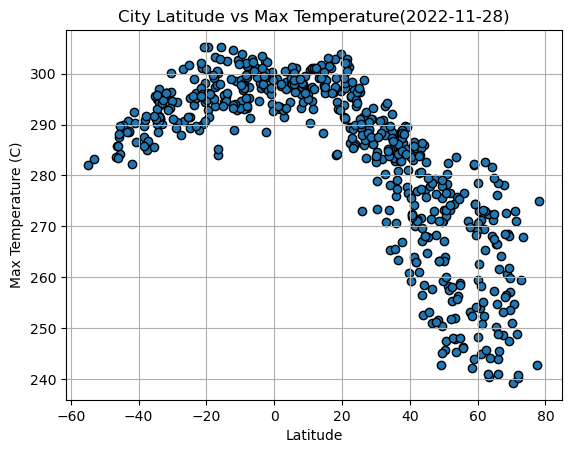

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature(2022-11-28)")

plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

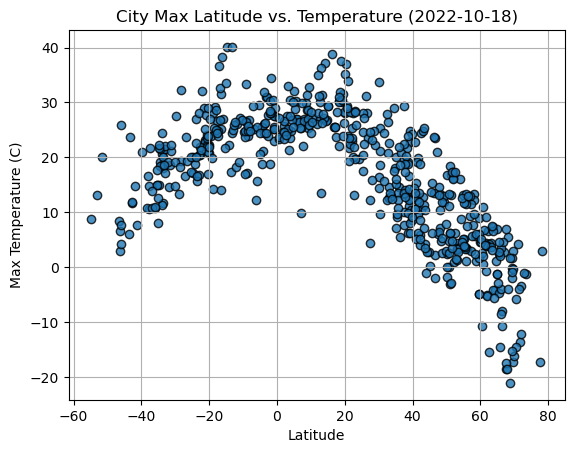

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Lng"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

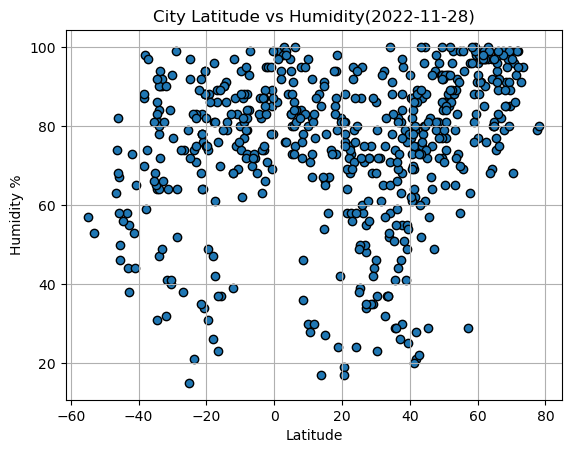

In [10]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs Humidity(2022-11-28)")

plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

#### Latitude Vs. Cloudiness

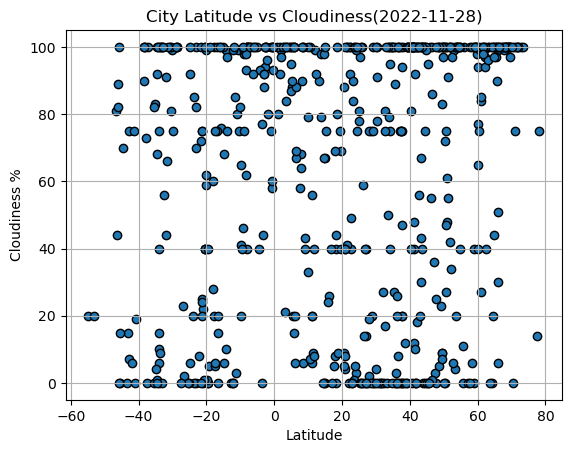

In [11]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs Cloudiness(2022-11-28)")

plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

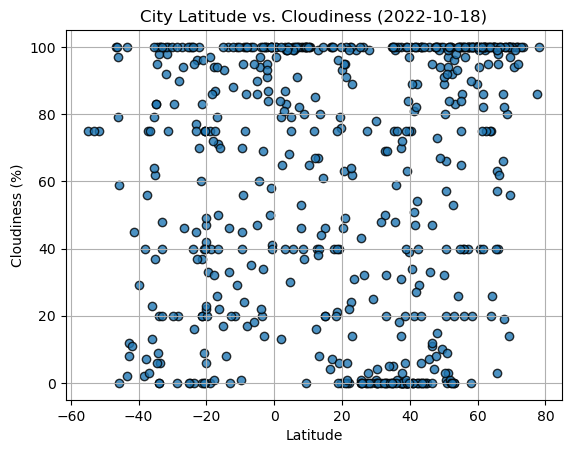

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

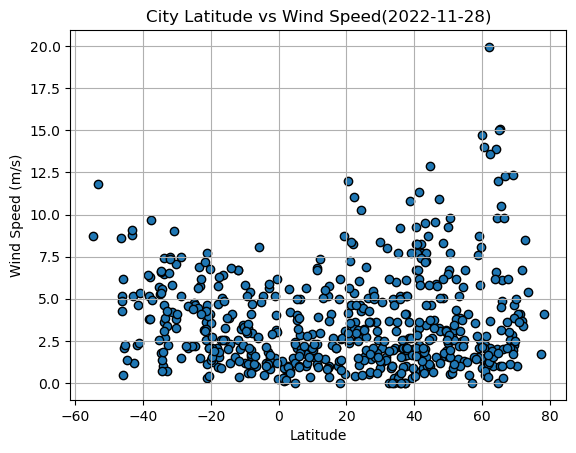

In [12]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed(2022-11-28)")

plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

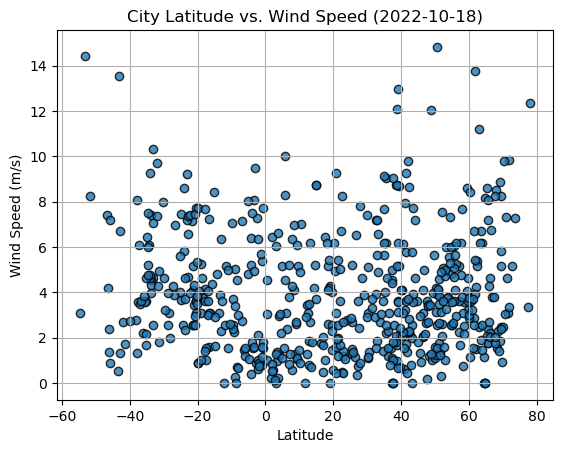

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0,:])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kaohsiung,22.6163,120.3133,295.39,73,40,3.60,TW,1669854543
4,broome,42.2506,-75.8330,276.87,74,100,7.72,US,1669854544
6,leh,34.1667,77.5833,265.32,58,95,0.31,IN,1669854336
8,aykhal,66.0000,111.5000,241.11,98,99,6.14,RU,1669854546
9,paamiut,61.9940,-49.6678,269.46,85,100,19.95,GL,1669854547


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0,:])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kaohsiung,22.6163,120.3133,295.39,73,40,3.60,TW,1669854543
4,broome,42.2506,-75.8330,276.87,74,100,7.72,US,1669854544
6,leh,34.1667,77.5833,265.32,58,95,0.31,IN,1669854336
8,aykhal,66.0000,111.5000,241.11,98,99,6.14,RU,1669854546
9,paamiut,61.9940,-49.6678,269.46,85,100,19.95,GL,1669854547


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0,:])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,301.24,83,75,4.63,TO,1669854542
1,new norfolk,-42.7826,147.0587,288.55,38,7,1.20,AU,1669854543
3,puerto ayora,-0.7393,-90.3518,294.01,89,58,3.13,EC,1669854245
5,sambava,-14.2667,50.1667,295.35,91,10,2.30,MG,1669854545
7,rikitea,-23.1203,-134.9692,296.00,71,82,5.76,PF,1669854364


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0,:])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:0.67721300212006


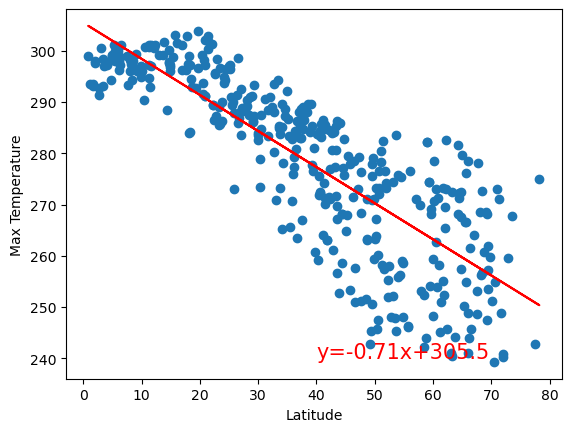

In [19]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40, 240), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is: 0.7161472181434118


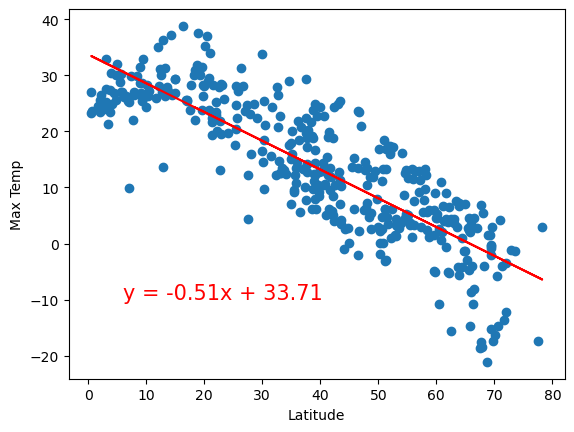

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is:{rvalue**2}")
plt.show()



The r-value is:0.43221572820006865


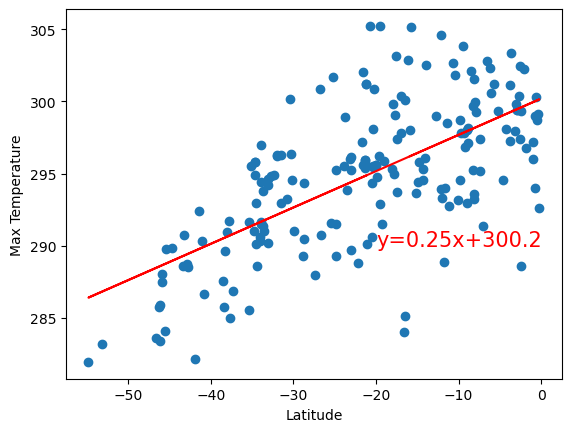

In [26]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20, 290), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is: 0.4121057168607245


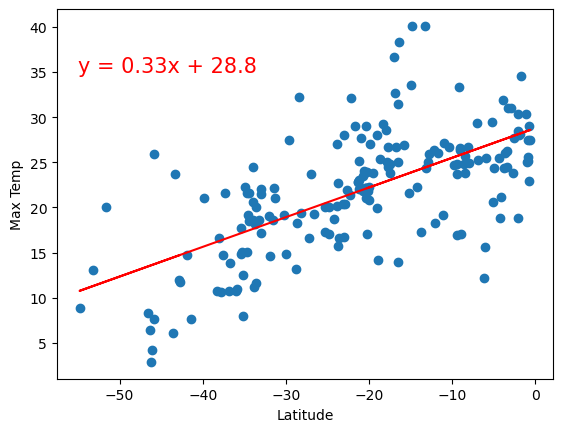

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.06575862185753165


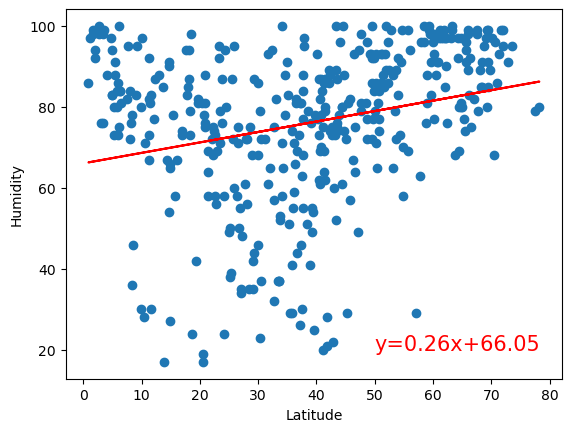

In [27]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is: 0.05689741545789598


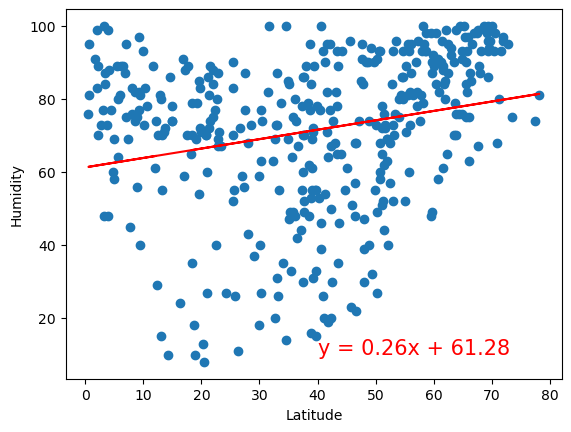

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is:0.09108018058912117


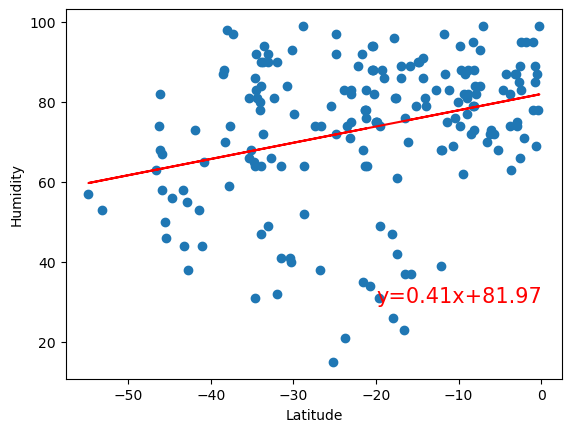

In [28]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20, 30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is: 0.0002808747046324607


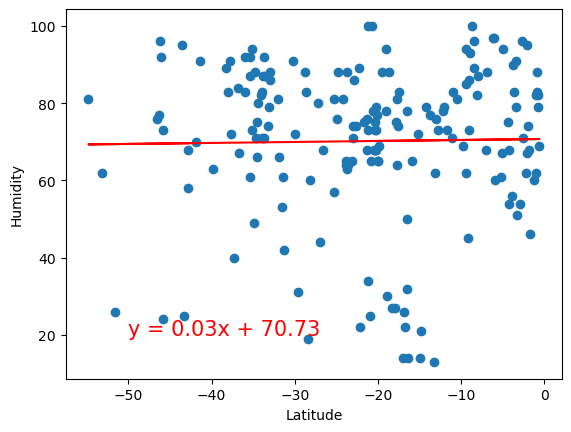

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.028317535541738884


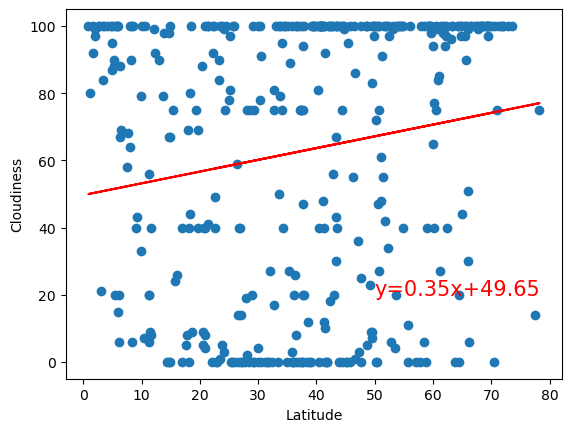

In [29]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is: 0.024026517125811015


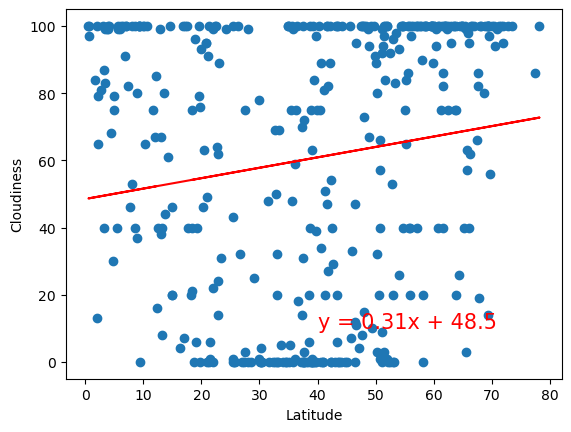

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is:0.07650289804548492


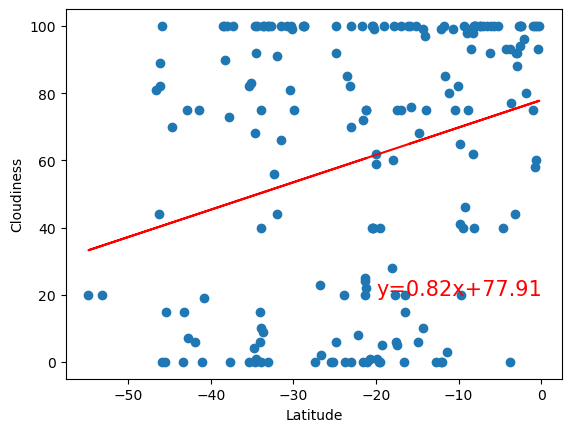

In [30]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is: 0.02056735429994368


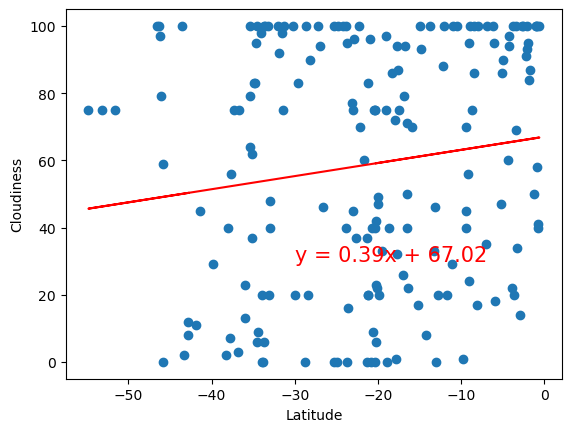

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.04168037431052235


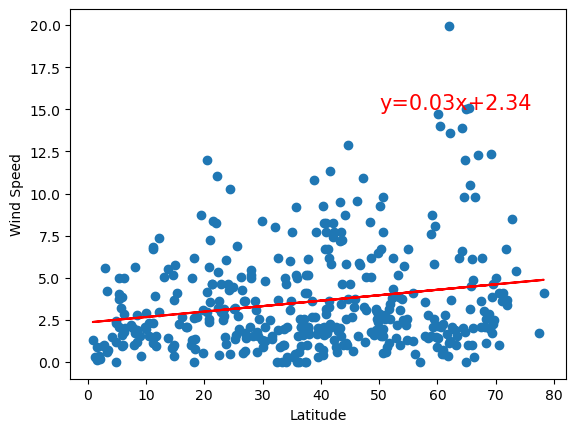

In [33]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 15), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is: 0.030396762354449467


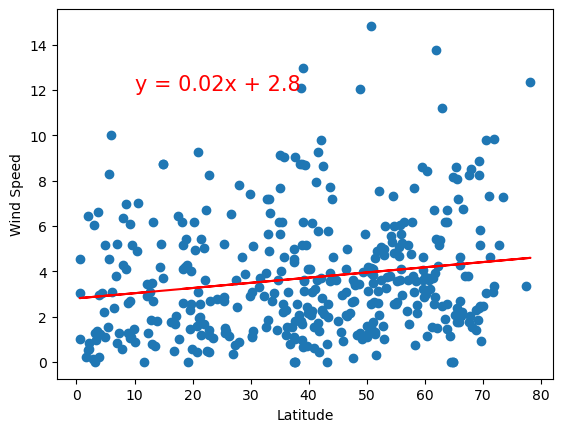

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is:0.1448506356814781


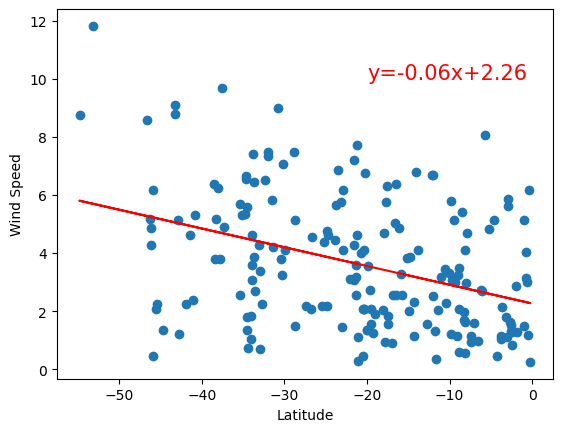

In [34]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20, 10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is: 0.062239040700515696


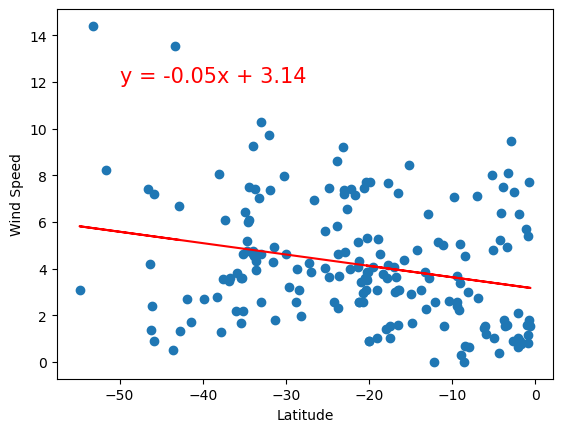

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE